In [3]:
import schemdraw
import schemdraw.elements as elm
import schemdraw.logic as log
import schemdraw.elements.intcircuits 
from schemdraw.parsing import logicparse

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

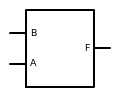

In [4]:
JK = elm.Ic(pins=[elm.IcPin(name ='A', side='left'),
                  elm.IcPin(name ='B', side='left'),
                  elm.IcPin(name='F', side='right', anchorname='QBAR')],
            pinspacing=1)
display(JK)

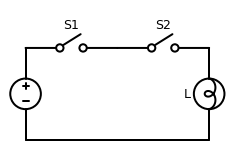

In [5]:
with schemdraw.Drawing() as d:
    d += elm.SourceV()
    d += elm.Switch().right().label('S1')
    d += elm.Switch().right().label('S2')
    d += elm.Lamp().down().label('L')
    d += elm.Line().left() 
    d += elm.Line().left() 
    

   

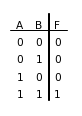

In [6]:
table = '''
 A | B | F
---|---|---
 0 | 0 | 0
 0 | 1 | 0
 1 | 0 | 0
 1 | 1 | 1
'''
schemdraw.logic.Table(table, colfmt='cc||c')

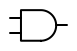

In [7]:
with schemdraw.Drawing() as d:
    elm.style(elm.STYLE_IEC)
    d += log.And()

In [8]:
elm.style(elm.STYLE_IEC)
d += elm.Resistor()


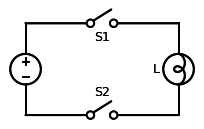

In [9]:
d = schemdraw.Drawing()
S = d.add(elm.SourceV())
S1 = d.add(elm.Switch().right(5).label('S1','bottom'))
L = d.add(elm.Lamp().down().label('L'))
S1 = d.add(elm.Switch().label('S2').flip().reverse().left(5))
display(d)


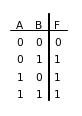

In [10]:
table = '''
 A | B | F
---|---|---
 0 | 0 | 0
 0 | 1 | 1
 1 | 0 | 1
 1 | 1 | 1
'''
schemdraw.logic.Table(table, colfmt='cc||c')

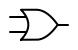

In [11]:
with schemdraw.Drawing() as d:
    elm.style(elm.STYLE_IEC)
    d += log.Or()

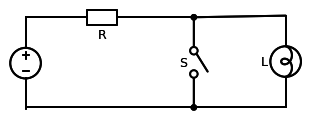

In [12]:
d = schemdraw.Drawing()
S = d.add(elm.SourceV())
S1 = d.add(elm.Resistor().right(5).label('R','bottom'))
d.add(elm.Line().right(0.5))
D1 = d.add(elm.Dot())
d.add(elm.Line(1))
L = d.add(elm.Lamp().down().label('L'))
d.add(elm.Line().left(3))
D2 = d.add(elm.Dot())
d.add(elm.Line().left(5.5))
S1 = d.add(elm.Switch().label('S').at(D1.center).to(D2.center))
display(d)

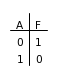

In [13]:
table = '''
 A | F
---|---
 0 | 1
 1 | 0

'''
schemdraw.logic.Table(table, colfmt='c|c')

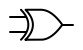

In [14]:
with schemdraw.Drawing() as d:
    elm.style(elm.STYLE_IEC)
    d += log.Xor()

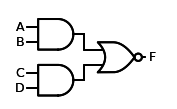

In [15]:
logicparse('not ((A and B) or (C and D))', outlabel='F')

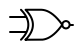

In [16]:
with schemdraw.Drawing() as d:
    elm.style(elm.STYLE_IEC)
    d += log.Xnor()

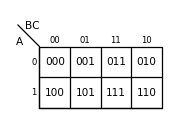

In [17]:
schemdraw.logic.Kmap(names='BCA',truthtable=[
    ('000','000'),
    ('001','100'),
    ('010','001'),
    ('011','101'),
    ('100','010'),
    ('101','110'),
    ('110','011'),
    ('111','111')])

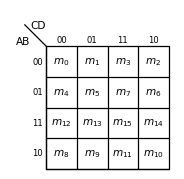

In [18]:
schemdraw.logic.Kmap(names='CDAB',truthtable=[
    ('0000','$m_0$'),
    ('0001','$m_4$'),
    ('0010','$m_8$'),
    ('0011','$m_{12}$'),
    ('0100','$m_1$'),
    ('0101','$m_5$'),
    ('0110','$m_9$'),
    ('0111','$m_{13}$'),
    ('1000','$m_2$'),
    ('1001','$m_6$'),
    ('1010','$m_{10}$'),
    ('1011','$m_{14}$'),
    ('1100','$m_3$'),
    ('1101','$m_7$'),
    ('1110','$m_{11}$'),
    ('1111','$m_{15}$'),
    ])

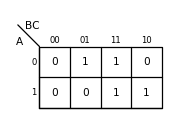

In [19]:
schemdraw.logic.Kmap(names='BCA',truthtable=[
    ('000','0'),
    ('001','0'),
    ('010','1'),
    ('011','0'),
    ('100','0'),
    ('101','1'),
    ('110','1'),
    ('111','1')])

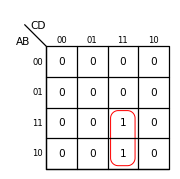

In [20]:
schemdraw.logic.Kmap(names='CDAB',truthtable=[
    ('0000','0'),
    ('0001','0'),
    ('0010','0'),
    ('0011','0'),
    ('0100','0'),
    ('0101','0'),
    ('0110','0'),
    ('0111','0'),
    ('1000','0'),
    ('1001','0'),
    ('1010','0'),
    ('1011','0'),
    ('1100','0'),
    ('1101','0'),
    ('1110','1'),
    ('1111','1'),
    ],
    groups={'111.':{'color':'red'}})

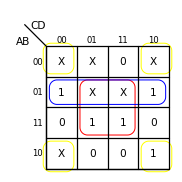

In [21]:
schemdraw.logic.Kmap(names='CDAB',truthtable=[
    ('0000','X'),
    ('0001','1'),
    ('0010','X'),
    ('0011','0'),
    ('0100','X'),
    ('0101','X'),
    ('0110','0'),
    ('0111','1'),
    ('1000','X'),
    ('1001','1'),
    ('1010','1'),
    ('1011','0'),
    ('1100','0'),
    ('1101','X'),
    ('1110','0'),
    ('1111','1'),
    ],
    groups={'.1.1':{'color':'red'},
    '..01':{'color':'blue'},
    '.0.0':{'color':'yellow'},
    })

In [22]:
d = schemdraw.Drawing()
left = {'cnt':3,
'labels':['TRG','THR','DIS'],
'plabels':['2','6','7'],
'loc':[.2,.35,.75],
'lblsize':12,
}
right = {'cnt':2,
'labels':['CTL','OUT'],
'plabels':['5','3'],
'lblsize':12,
}
top = {'cnt':2,
'labels':['RST','Vcc'],
'plabels':['4','8'],
'lblsize':12,
}
bot = {'cnt':1,
'labels':['GND'],
'plabels':['1'],
'lblsize':12,
}

IC555 = elm.blackbox(d.unit*1.5, d.unit*2.25,
linputs=left, rinputs=right, tinputs=top, binputs=bot,
leadlen=1, mainlabel='555')
T = d.add(IC555)
BOT = d.add(elm.GND, xy=T.GND) # Note: Anchors named same as pin labels
d.add(elm.DOT)
d.add(elm.RES, endpts=[T.DIS, T.THR], label='Rb')
d.add(elm.RES, d='up', xy=T.DIS, label='Ra', rgtlabel='+Vcc')
d.add(elm.LINE, endpts=[T.THR, T.TRG])
d.add(elm.CAP, xy=T.TRG, d='down', toy=BOT.start, label='C', l=d.unit/2)
d.add(elm.LINE, d='right', tox=BOT.start)
d.add(elm.CAP, d='down', xy=T.CTL, toy=BOT.start, botlabel='.01$\mu$F')
d.add(elm.DOT)
d.add(elm.DOT, xy=T.DIS)
d.add(elm.DOT, xy=T.THR)
d.add(elm.DOT, xy=T.TRG)
d.add(elm.LINE, endpts=[T.RST,T.Vcc])
d.add(elm.DOT)
d.add(elm.LINE, d='up', l=d.unit/4, rgtlabel='+Vcc')
d.add(elm.RES, xy=T.OUT, d='right', label='330')
d.add(elm.LED, flip=True, d='down', toy=BOT.start)
d.add(elm.LINE, d='left', tox=BOT.start)
d.draw()


AttributeError: Element `blackbox` not found.

In [ ]:
liqing.gongji()

打了一下，造成50伤害


In [ ]:
print(liqing.name)

liqing
